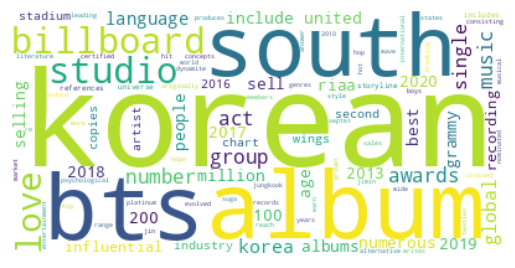

In [4]:
with open('./sample_data/sample.txt', 'r') as f:
  docs = f.readlines()
#for id, doc in enumerate(docs):
  #print('[{}] : {}...'.format(id, doc[:30]))

from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf 벡터 매트릭스 생성
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
#print('type of tfidf_matrix {}'.format(type(tfidf_matrix)))
#print('shape of tfidf_matrix {}'.format(tfidf_matrix.shape))

vocab = sorted(tfidf.vocabulary_.items())
#vocab[10:20]

import pandas as pd

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
#print(df.head(5))

tfidf_table = tfidf_matrix.toarray()

keywords = []
for weight in tfidf_table:
  w_vec = list(enumerate(weight))
  w_vec = sorted(w_vec, key=lambda x : x[1], reverse=True)
  #print(w_vec[:3])
  keywords.append(w_vec)

import numpy as np
def tfidf_rank(tfidf_matrix):
  rank = []
  avg, stddev = 0.0, 0.0
  #문서 별 tfidf 가중치의 합 계산 : (문서id, 가중치 합)
  for idx, tfidf in enumerate(tfidf_matrix):
    rank.append((idx, tfidf.sum()))
    
  #가중치의 합이 높은 문서 순으로 정렬
  rank.sort(key=lambda x : x[1], reverse=True)
  #tfidf의 평균과 표준편차 계산
  tfidf_sum = [tfidf.sum() for tfidf in tfidf_matrix]
  avg = np.mean(tfidf_sum)
  stddev = np.std(tfidf_sum)
  return rank, avg, stddev

rank, avg, stddev = tfidf_rank(tfidf_matrix)

#print(rank[:2])
#print('avg = {}, stddev = {}'.format(avg, stddev))

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
#print(result[:10])

tfidf2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf2.fit_transform(docs)
#print('shape of tfidf_matrix2 = {}'.format(tfidf_matrix2.shape))
df = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf2.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
#print(result[:10])

#과제 1번
import matplotlib.pyplot as plt
from wordcloud import WordCloud
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(result)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()